Here, in this note book we will try to apply LDA on the iris data, which has sepal length, sepal width, petal length and petal width as the characteristic data to identify the species Setosa, Versicolor, and Virginica.
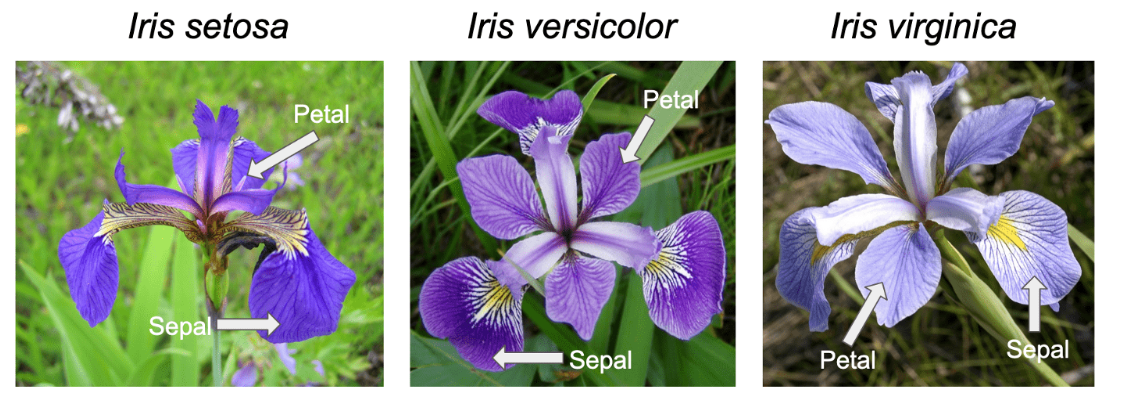

In [1]:
### fetching the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# load the iris dataset
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names,
                       data=iris.data)
dataset['target'] = iris.target

In [14]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


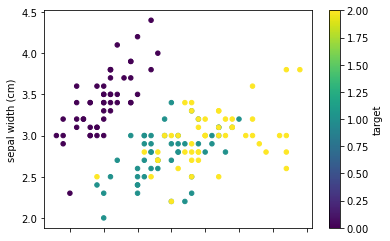

In [25]:
## make plot of each category with sepal and petal
dataset.plot.scatter(x='sepal length (cm)',
                      y='sepal width (cm)',
                      c='target',
                      colormap='viridis',
                     xlabel='sepal length (cm)', 
                     ylabel='sepal width (cm)');

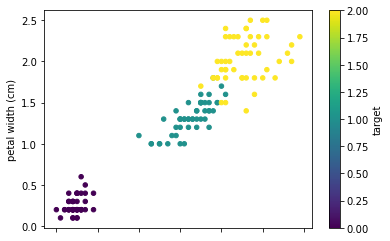

In [7]:
## make plot of each category with sepal and petal
dataset.plot.scatter(x='petal length (cm)',
                      y='petal width (cm)',
                      c='target',
                      colormap='viridis',
                     xlabel='petal length (cm)', 
                     ylabel='petal width (cm)');

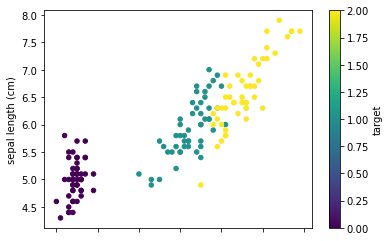

In [8]:
## make plot of each category with sepal and petal
dataset.plot.scatter(x='petal length (cm)',
                      y='sepal length (cm)',
                      c='target',
                      colormap='viridis',
                     xlabel='petal length (cm)', 
                     ylabel='sepal length (cm)');

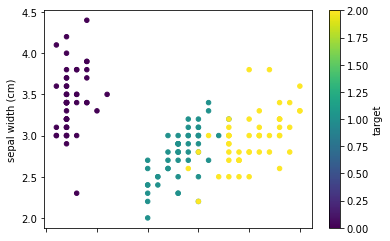

In [9]:
## make plot of each category with sepal and petal
dataset.plot.scatter(x='petal width (cm)',
                      y='sepal width (cm)',
                      c='target',
                      colormap ='viridis',
                     xlabel='petal width (cm)', 
                     ylabel='sepal width (cm)');

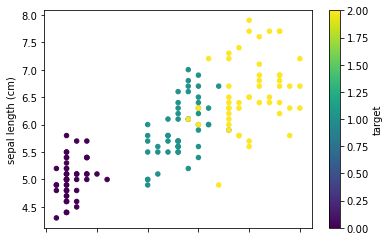

In [11]:
## make plot of each category with sepal and petal
dataset.plot.scatter(x='petal width (cm)',
                      y='sepal length (cm)',
                      c='target',
                      colormap='viridis',
                     xlabel='petal width (cm)', 
                     ylabel='sepal length (cm)');

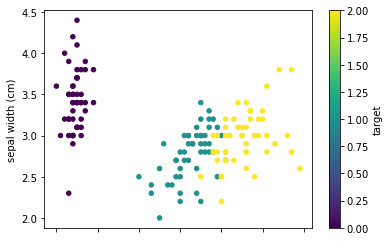

In [27]:
## make plot of each category with sepal and petal
dataset.plot.scatter(x='petal length (cm)',
                      y='sepal width (cm)',
                      c='target',
                      colormap='viridis',
                    xlabel='petal length (cm)', 
                     ylabel='sepal width (cm)');

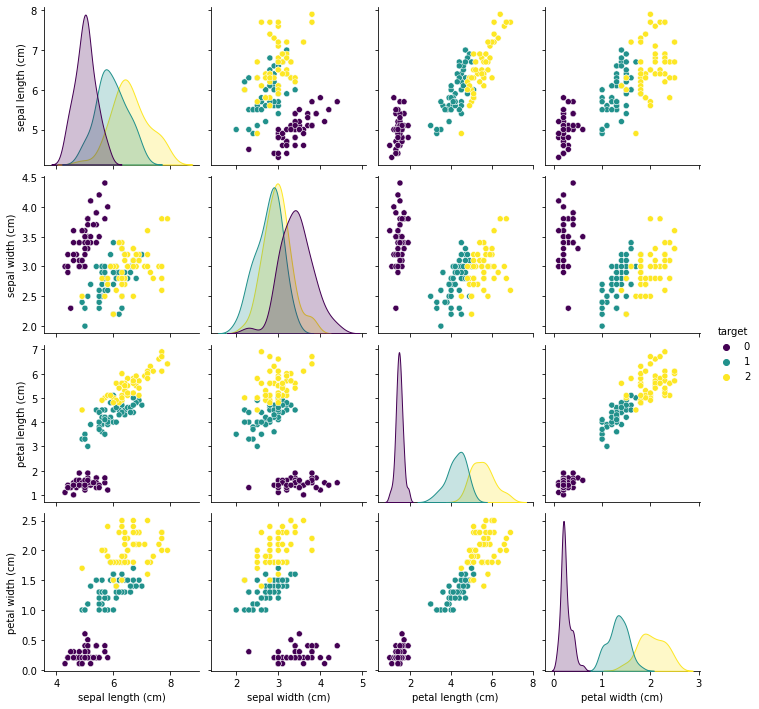

In [37]:
import seaborn as sns
#sns.color_palette('viridis')
sns.pairplot(dataset, hue='target', palette = 'viridis')

In [23]:
# divide the dataset into feature matrix and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.3)


# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,
                                    random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.9555555555555556
[[15  0  0]
 [ 0 15  2]
 [ 0  0 13]]


In [29]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

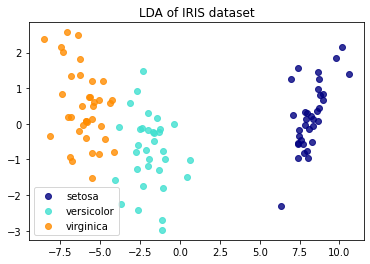

In [24]:
target_names = iris.target_names
colors = ["navy", "turquoise", "darkorange"]
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_train[y_train == i, 0], X_train[y_train == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()